In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.3.0'

In [3]:
# 输入层 h0 784 =28*28
# 隐藏层 h1 256 
# 隐藏层 h2 128 
# 输出层 h3 10

In [4]:
#初始化参数
w1 =tf.Variable(tf.random.truncated_normal([784,256],stddev=0.1))
w2 =tf.Variable(tf.random.truncated_normal([256,128],stddev=0.1))
w3 =tf.Variable(tf.random.truncated_normal([128,10],stddev=0.1))

b1 = tf.Variable(tf.zeros([256]))
b2 = tf.Variable(tf.zeros([128]))
b3 = tf.Variable(tf.zeros([10]))

In [5]:
#w1,b1

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape) 

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [8]:
type(x_train)

numpy.ndarray

In [9]:
x_train = tf.convert_to_tensor(x_train,dtype=tf.float32)/255.
y_train = tf.convert_to_tensor(y_train,dtype=tf.int32)

In [10]:
# (60000,784)
x_train =tf.reshape(x_train,[-1,28*28])  #-1代表任意多个
x_train.shape

TensorShape([60000, 784])

In [11]:
type(x_train)

tensorflow.python.framework.ops.EagerTensor

# 2 完成一次前向计算

In [12]:
x_train.shape,w1.shape,b1.shape

(TensorShape([60000, 784]), TensorShape([784, 256]), TensorShape([256]))

In [13]:
# h1: net1(z=sum(wx+b)) out1(f(z))
# [60000,784]@[784,256]+[256]
net1 = x_train@w1 + tf.broadcast_to(b1,[x_train.shape[0],256])
out1 = tf.nn.relu(net1)
out1.shape

TensorShape([60000, 256])

In [14]:
# h2: net2(z=sum(wx+b)) out1(f(z))
# [60000,256]@[256,128]+[128]
net2 = out1@w2 + b2
out2 = tf.nn.relu(net2)
out2.shape

TensorShape([60000, 128])

In [15]:
# h3: net3(z=sum(wx+b)) out1(f(z))
# [60000,128]@[128,10]+[10]
net3 = out2@w3 + b3
out3 = tf.nn.softmax(net3)
out3.shape

TensorShape([60000, 10])

In [16]:
out3

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0.10204472, 0.0779084 , 0.0484806 , ..., 0.19695051, 0.04349801,
        0.03354472],
       [0.11876485, 0.09845483, 0.07231752, ..., 0.0973717 , 0.07871947,
        0.08635692],
       [0.24010159, 0.07428236, 0.05122573, ..., 0.08930605, 0.12808084,
        0.04568657],
       ...,
       [0.18511285, 0.05718812, 0.06010796, ..., 0.10186294, 0.09804599,
        0.07580586],
       [0.12212225, 0.11493826, 0.05924354, ..., 0.06182413, 0.05314185,
        0.08350914],
       [0.2160503 , 0.05151211, 0.04637839, ..., 0.10219729, 0.08174842,
        0.05673639]], dtype=float32)>

In [17]:
y_train

<tf.Tensor: shape=(60000,), dtype=int32, numpy=array([5, 0, 4, ..., 5, 6, 8])>

In [18]:
y_train = tf.one_hot(y_train,depth = 10)

In [19]:
y_train

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [20]:
y_train.shape

TensorShape([60000, 10])

In [21]:
loss = tf.nn.softmax_cross_entropy_with_logits(labels=y_train, logits=out3)
loss =tf.reduce_mean(loss)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.3076797>

# 3 反向传播

In [22]:
with tf.GradientTape() as tape:
    tape.watch([w1,b1,w2,b2,w3,b3])
    out3 = tf.nn.softmax((tf.nn.relu((tf.nn.relu((x_train@w1 + tf.broadcast_to(b1,[x_train.shape[0],256]))))@w2 + b2))@w3 + b3)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_train, logits=out3))

In [23]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.3076797>

In [24]:
grads = tape.gradient(loss,[w1,b1,w2,b2,w3,b3])

In [25]:
# grads[0],grads[1]

In [26]:
lr = 0.01

In [27]:
# 更新梯度
# w = w-lr*grads
# w -= lr*grads
# tf.assign_sub

In [28]:
All_loss = []
for step in range(5001):
    with tf.GradientTape() as tape:
        tape.watch([w1,b1,w2,b2,w3,b3])
        out3 = tf.nn.softmax((tf.nn.relu((tf.nn.relu((x_train@w1 + tf.broadcast_to(b1,[x_train.shape[0],256]))))@w2 + b2))@w3 + b3)
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_train, logits=out3))
    All_loss.append(loss)
    grads = tape.gradient(loss,[w1,b1,w2,b2,w3,b3])
    # 更新参数
    w1.assign_sub(lr*grads[0])
    b1.assign_sub(lr*grads[1])
    w2.assign_sub(lr*grads[2])
    b2.assign_sub(lr*grads[3])
    w3.assign_sub(lr*grads[4])
    b3.assign_sub(lr*grads[5])
    # 输出
    if step%100 == 0:
        print(step,'loss:',float(loss))

0 loss: 2.3076796531677246
100 loss: 2.2943384647369385
200 loss: 2.276362419128418
300 loss: 2.2506511211395264
400 loss: 2.214660882949829
500 loss: 2.1731033325195312
600 loss: 2.137152910232544
700 loss: 2.1102612018585205
800 loss: 2.088287115097046
900 loss: 2.0644962787628174
1000 loss: 2.035543203353882
1100 loss: 2.0034372806549072
1200 loss: 1.9680982828140259
1300 loss: 1.9354956150054932
1400 loss: 1.907530426979065
1500 loss: 1.88223397731781
1600 loss: 1.8603167533874512
1700 loss: 1.8419945240020752
1800 loss: 1.8268487453460693
1900 loss: 1.8143377304077148
2000 loss: 1.8039273023605347
2100 loss: 1.7951716184616089
2200 loss: 1.7877177000045776
2300 loss: 1.7812994718551636
2400 loss: 1.7757177352905273
2500 loss: 1.7708193063735962
2600 loss: 1.7664867639541626
2700 loss: 1.76262629032135
2800 loss: 1.759162187576294
2900 loss: 1.7560372352600098
3000 loss: 1.753204345703125
3100 loss: 1.7506223917007446
3200 loss: 1.7482579946517944
3300 loss: 1.7460849285125732
3400

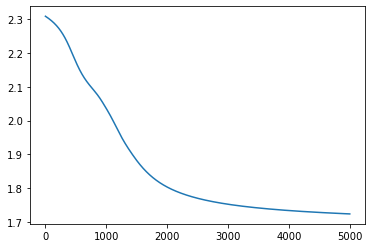

In [29]:
plt.plot(All_loss)

# 测试模型 

In [30]:
x_test= tf.convert_to_tensor(x_test,dtype=tf.float32)/255.
y_test = tf.convert_to_tensor(y_test,dtype=tf.int32)
x_test =tf.reshape(x_test,[-1,28*28]) 

In [31]:
out3 = tf.nn.softmax((tf.nn.relu((tf.nn.relu((x_test@w1 + b1)))@w2 + b2))@w3 + b3)
out3.shape

TensorShape([10000, 10])

In [32]:
y_predict = tf.math.argmax(out3,axis=-1)

In [33]:
y_predict,y_test

(<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 6, 1, ..., 4, 8, 6], dtype=int64)>,
 <tf.Tensor: shape=(10000,), dtype=int32, numpy=array([7, 2, 1, ..., 4, 5, 6])>)

In [34]:
y_test = tf.cast(y_test,tf.int64)

In [35]:
y_c = tf.math.equal(y_predict,y_test)
y_c

<tf.Tensor: shape=(10000,), dtype=bool, numpy=array([ True, False,  True, ...,  True, False,  True])>

In [36]:
y_c = tf.cast(y_c,tf.int64)

In [37]:
tf.math.reduce_sum(y_c)

<tf.Tensor: shape=(), dtype=int64, numpy=7501>

In [39]:
r = tf.math.reduce_sum(y_c)/10000
r.numpy()

0.7501

In [44]:
# batch size
batchDataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(128)
train_iter = iter(batch)
sample = next(train_iter)
sample[0].shape,sample[1].shape

(TensorShape([128, 784]), TensorShape([128, 10]))

In [ ]:
#for epoch in range(100):
#    for step,(x_batch,y_batch) in enumerate(batchDataset):   #enumerate返回索引值
#        ...        